In [1]:
import requests, pandas as pd, numpy as np
from pandas import DataFrame
from io import StringIO
import time, json
from datetime import date
import statsmodels
from statsmodels.tsa.stattools import adfuller, acf, pacf
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
transactions_im = pd.read_csv('transactions_cluster4.csv', header=0)

In [3]:
transactions = transactions_im.fillna(0)

In [4]:
transactions['date'] = pd.to_datetime(transactions['date'], format = '%Y-%m-%d')
transactions = transactions.set_index('date')

In [5]:
ts = transactions.mean(axis=1)

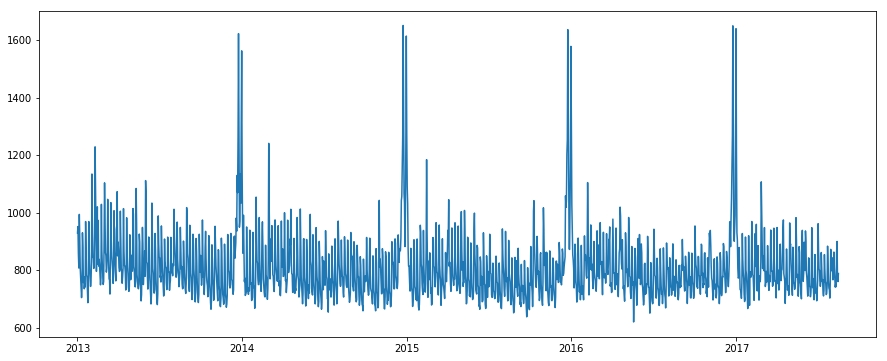

In [6]:
plt.plot(ts.index.to_pydatetime(), ts.values)

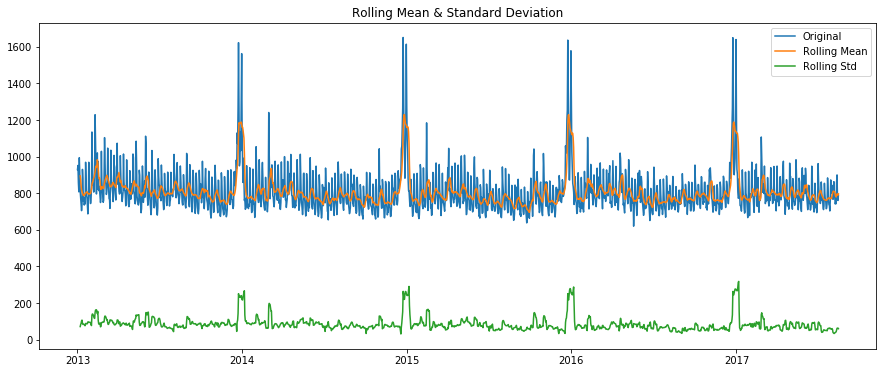

In [7]:
rolmean = ts.rolling(window=7).mean()
rolstd = ts.rolling(window=7).std()

#Plot rolling statistics:
orig = plt.plot(ts, label='Original')
mean = plt.plot(rolmean, label='Rolling Mean')
std = plt.plot(rolstd, label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [8]:
test = adfuller(ts, autolag='AIC')
print('ADF Statistic: \t\t' + str(test[0]))
print('P Value: \t\t' + str(test[1]))
print('Lags Used: \t\t' + str(test[2]))
print('Observations: \t\t' + str(test[3]))
for key,value in test[4].items():
    print('Critical Value ' + str(key) + ': \t' + str(value))
print('Information Criterion: \t' + str(test[5]))

ADF Statistic: 		-7.94821504424
P Value: 		3.1774717081e-12
Lags Used: 		21
Observations: 		1666
Critical Value 1%: 	-3.43428121504
Critical Value 5%: 	-2.86327640807
Critical Value 10%: 	-2.56769442141
Information Criterion: 	18292.934951


In [9]:
ts_log = np.log(ts)

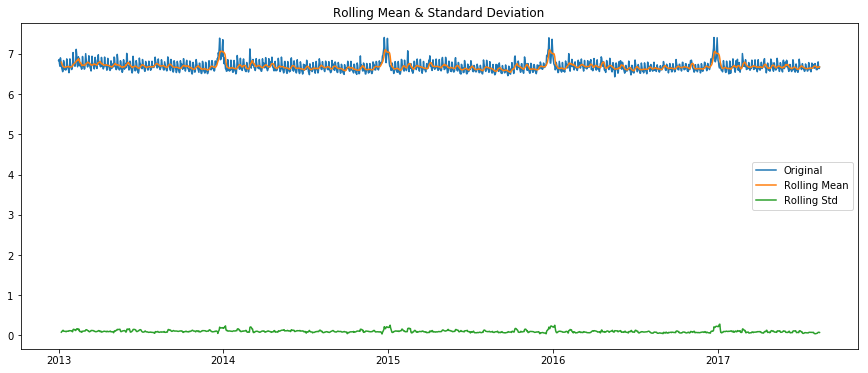

In [10]:
rolmean = ts_log.rolling(window=7).mean()
rolstd = ts_log.rolling(window=7).std()

#Plot rolling statistics:
orig = plt.plot(ts_log, label='Original')
mean = plt.plot(rolmean, label='Rolling Mean')
std = plt.plot(rolstd, label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [11]:
test = adfuller(ts_log, autolag='AIC')
print('ADF Statistic: \t\t' + str(test[0]))
print('P Value: \t\t' + str(test[1]))
print('Lags Used: \t\t' + str(test[2]))
print('Observations: \t\t' + str(test[3]))
for key,value in test[4].items():
    print('Critical Value ' + str(key) + ': \t' + str(value))
print('Information Criterion: \t' + str(test[5]))

ADF Statistic: 		-8.06978336465
P Value: 		1.5607695749e-12
Lags Used: 		21
Observations: 		1666
Critical Value 1%: 	-3.43428121504
Critical Value 5%: 	-2.86327640807
Critical Value 10%: 	-2.56769442141
Information Criterion: 	-4510.55378066


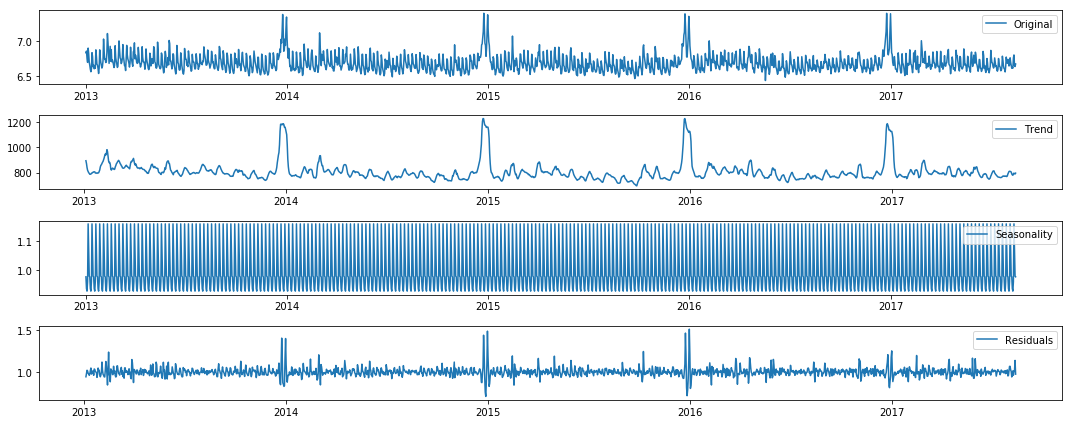

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts,model='multiplicative')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

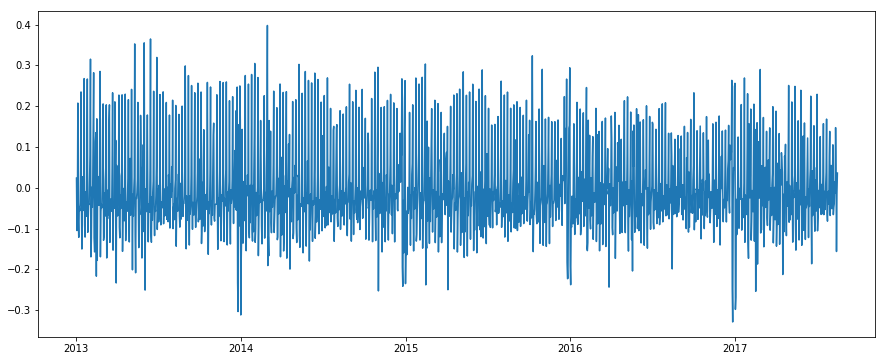

In [13]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff.index.to_pydatetime(), ts_log_diff.values)

In [14]:
ts_log_diff.dropna(inplace=True)

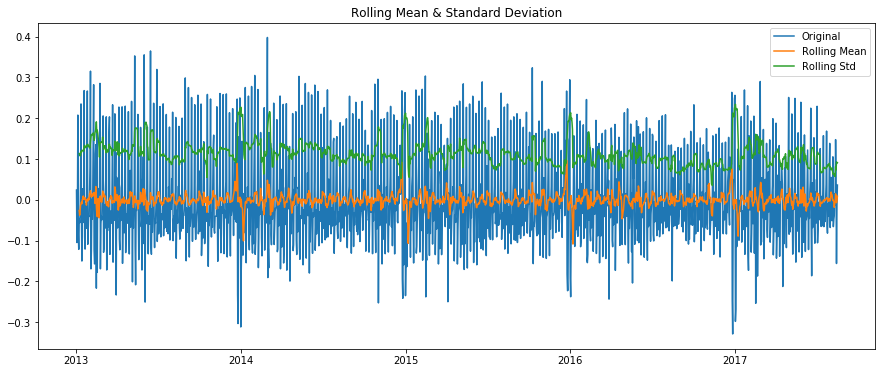

In [15]:
rolmean = ts_log_diff.rolling(window=7).mean()
rolstd = ts_log_diff.rolling(window=7).std()

#Plot rolling statistics:
orig = plt.plot(ts_log_diff, label='Original')
mean = plt.plot(rolmean, label='Rolling Mean')
std = plt.plot(rolstd, label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [16]:
test = adfuller(ts_log_diff, autolag='AIC')
print('ADF Statistic: \t\t' + str(test[0]))
print('P Value: \t\t' + str(test[1]))
print('Lags Used: \t\t' + str(test[2]))
print('Observations: \t\t' + str(test[3]))
for key,value in test[4].items():
    print('Critical Value ' + str(key) + ': \t' + str(value))
print('Information Criterion: \t' + str(test[5]))

ADF Statistic: 		-12.464020893
P Value: 		3.35671947991e-23
Lags Used: 		25
Observations: 		1661
Critical Value 1%: 	-3.43429306728
Critical Value 5%: 	-2.86328163972
Critical Value 10%: 	-2.56769720719
Information Criterion: 	-4474.53007723


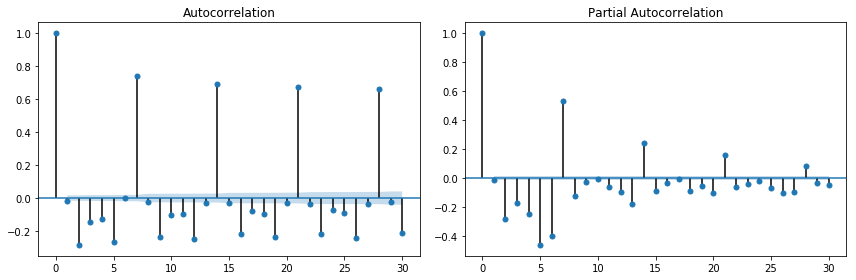

In [17]:
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(ts_log_diff, lags=30, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(ts_log_diff, lags=30, ax=axes[1], alpha=0.5)
plt.tight_layout()

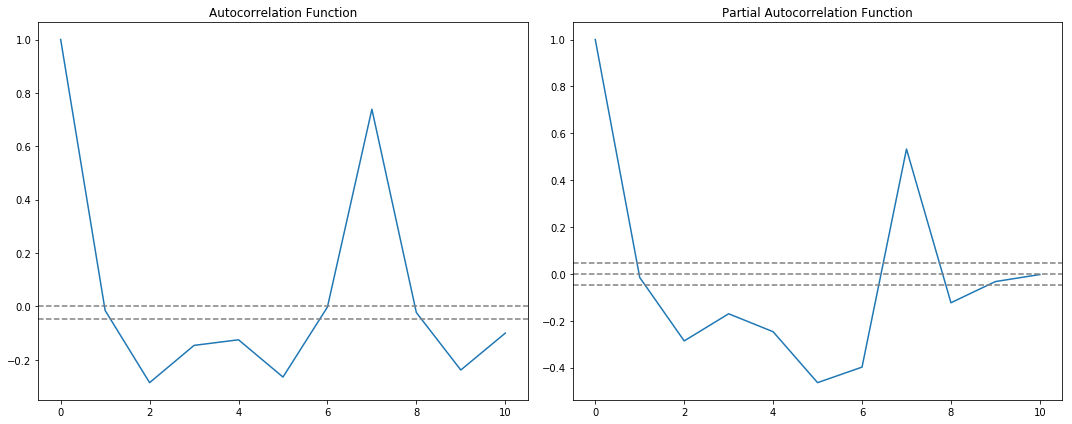

In [18]:
#ACF and PACF plots

lag_acf = acf(ts_log_diff, nlags=10)
lag_pacf = pacf(ts_log_diff, nlags=10, method='ols')

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [19]:
train_size = int(len(ts_log_diff) * 0.7)
test_size = len(ts_log_diff) - train_size
train, test = ts_log_diff[ts_log_diff.index[0].to_pydatetime():ts_log_diff.index[train_size].to_pydatetime()], ts_log_diff[ts_log_diff.index[train_size].to_pydatetime():ts_log_diff.index[len(ts_log_diff)-1].to_pydatetime()]
print(len(train), len(test))

1181 507


In [20]:
mod = sm.tsa.statespace.SARIMAX(ts_log_diff[:1181], trend='n', order=(2,2,1), seasonal_order=(2,2,1,12))
results = mod.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                 1181
Model:             SARIMAX(2, 2, 1)x(2, 2, 1, 12)   Log Likelihood                 353.380
Date:                            Thu, 14 Dec 2017   AIC                           -692.760
Time:                                    19:17:20   BIC                           -657.242
Sample:                                01-02-2013   HQIC                          -679.370
                                     - 03-27-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6047      0.035    -17.087      0.000      -0.674      -0.535
ar.L2         -0.3734      0.037   

In [21]:
#predictions=results.predict(start=ts_log_diff.index[0].to_pydatetime(),end=ts_log_diff.index[1686].to_pydatetime(),dynamic=True)

In [22]:
from datetime import datetime, timedelta
format = '%Y-%m-%d'
a=datetime.strptime('2017-02-28',format)
b=datetime.strptime('2017-08-14',format)
predictions=results.predict(start=ts_log_diff.index[1150].to_pydatetime(),end=ts_log_diff.index[1686].to_pydatetime())

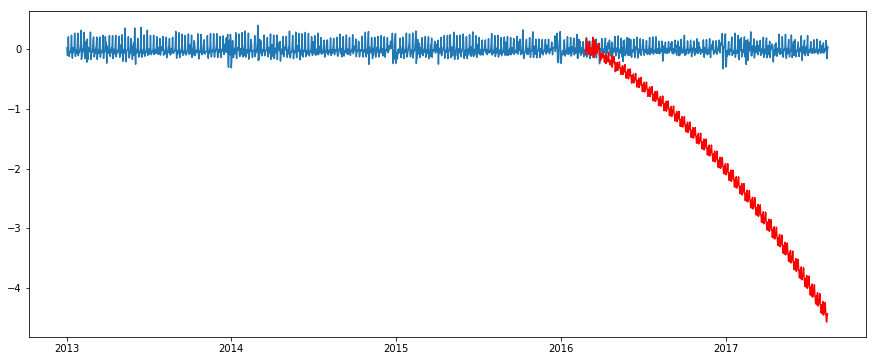

In [23]:
plt.plot(ts_log_diff.index.to_pydatetime(), ts_log_diff.values)
plt.plot(ts_log_diff[1149:1686].index.to_pydatetime(), predictions, color='red')
#plt.title('RSS: %.4f'% sum(predictions-ts_log_diff[1150:1686])**2)

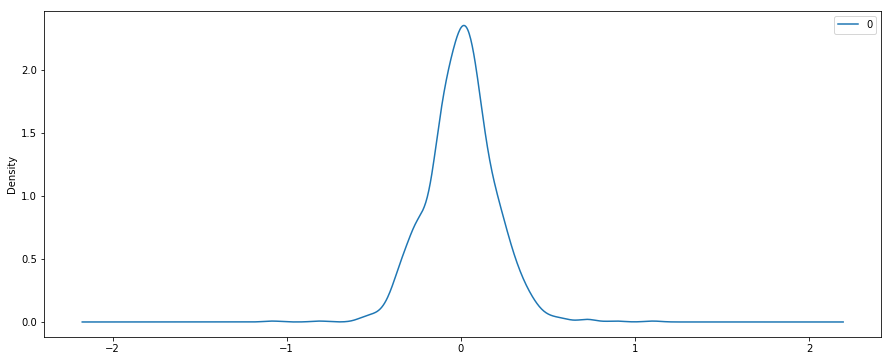

In [24]:
residuals = DataFrame(results.resid)
residuals.plot(kind='kde')

In [25]:
print(residuals.describe())

                 0
count  1181.000000
mean      0.000724
std       0.195120
min      -1.081686
25%      -0.113925
50%       0.004729
75%       0.109870
max       1.102838


In [26]:
predictions_SARIMAX_diff = pd.Series(predictions, copy=True)
print(predictions_SARIMAX_diff.head())

2016-02-26   -0.093110
2016-02-27   -0.004260
2016-02-28    0.172503
2016-02-29   -0.022558
2016-03-01    0.049260
Freq: D, dtype: float64


In [27]:
predictions_SARIMAX_diff_cumsum = predictions_SARIMAX_diff.cumsum()
predictions_SARIMAX_log = pd.Series(ts_log.iloc[0], index=ts_log.index[1150:1686])

In [28]:
predictions_SARIMAX_log = predictions_SARIMAX_log.add(predictions_SARIMAX_diff_cumsum,fill_value=0)

In [29]:
predictions_SARIMAX = np.exp(predictions_SARIMAX_log)

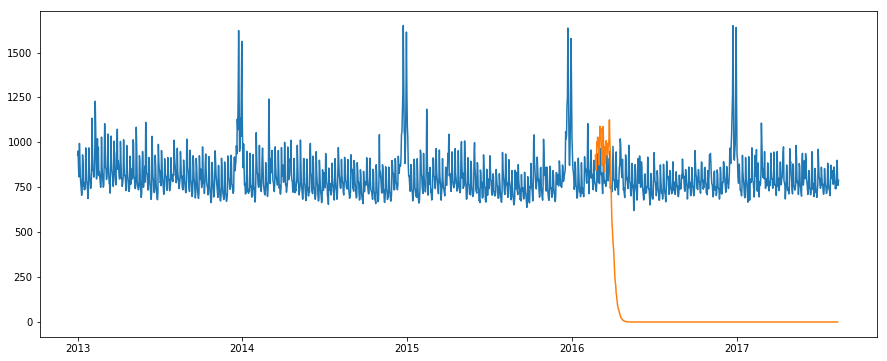

In [30]:
plt.plot(ts.index.to_pydatetime(), ts.values)
plt.plot(ts.index[1148:1686].to_pydatetime(), predictions_SARIMAX.values)
#plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_SARIMAX-ts[1150:1686])**2)/len(ts[1150:1686])))

In [31]:
expected=list(ts)

In [32]:
bias=[expected[i+1148]-predictions_SARIMAX[i] for i in range(len(predictions_SARIMAX))]

In [33]:
mean_forcast_error=sum(bias)/len(bias)
print('Mean forcast error: %f' % mean_forcast_error)

Mean forcast error: 727.253371


In [34]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(expected[1148:1686], predictions_SARIMAX)
print('MAE: %f' % mae)

MAE: 746.412430
